# Tarea # 1 - Aprendizaje Automático

Alejandro Baltodano Madrigal, carné: 200928915

Fernando González Mata, cédula: 115400523

Cree un ambiente de trabajo (.ipynb) basado en PYTHON3 y llamarle Tarea-1.ipynb, además debe contener las librerías: numpy, matplotlib, scikit-learn, pandas, jupyter notebook como mínimo, puede agregar las que considere necesario. El objetivo de esta Tarea 1 consiste en normalizar y estandarizar el set de datos de `daily-min-temperatures.csv` de forma manual y automática a partir de scikit-learn o la librería que considere apropiada. El entregable consiste en el url de la notebook Tarea-1.ipynb en GITHUB. Subir al TEC Digital un archivo .txt simple con el url a más tardar el día acordado en clase e
indicado en el TEC Digital, envíos pasado el límite de entrega se aplicará la penalización discutida en clase.

#### Carga de datos

El archivo `daily-min-temperatures.csv` un registro de las temperaturas diarias de algún lugar desde el 1 de enero de 1981 hasta el 31 de diciembre de 1990. Como parte del ejercicio se solicita normalizar y estandarizar los valores de las temperaturas.

Para la carga de datos se utiliza la biblioteca pandas para cargar en un DataFrame los datos del archivo CSV. Una vez cargados en memoria se obtienen únicamente los valores numéricos de temperatura de cada día.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Importar datos desde un archivo CSV a un DataFrame
dataset = pd.read_csv('daily-min-temperatures.csv').to_numpy()

#Trasponer solo columna numérica a matriz
dataset_T = np.array([dataset[:,1]]).T

#### Normalización de los datos

La normalización de los datos se realiza con la biblioteca `scikit-learn` y a través de una normalización manual basada en aritmética básica. En el siguiente fragmento de código se puede apreciar el cálculo de ambos métodos.

A su vez se presenta un histograma comparando los cambios entre los datos crudos y las dos normalizaciones aplicadas en este ejemplo.


Normalizar con sklearn
 [[0.78707224]
 [0.68060837]
 [0.7148289 ]
 ...
 [0.51330798]
 [0.59695817]
 [0.49429658]]

Normalizar con función
 [[0.7870722433460076]
 [0.6806083650190113]
 [0.714828897338403]
 ...
 [0.5133079847908745]
 [0.596958174904943]
 [0.49429657794676807]]


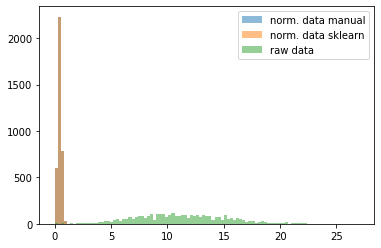

In [35]:
#Normalizar con sklearn
scaler = MinMaxScaler()
normDatasetSklearn = scaler.fit_transform(dataset_T)

print('Normalizar con sklearn\n', normDatasetSklearn)

#Normalizar con funcion
def normalized(dataset):
  normalized = (dataset - np.min(dataset)) / (np.max(dataset) - np.min(dataset))
  return np.array([normalized]).T

normDatasetManual = normalized(dataset[:,1])
print('\nNormalizar con función\n', normDatasetManual)

bins = np.linspace(0, 27, 100)

plt.hist(normDatasetManual, bins, alpha=0.5, label='norm. data manual')
plt.hist(normDatasetSklearn, bins, alpha=0.5, label='norm. data sklearn')
plt.hist(dataset_T, bins, alpha=0.5, label='raw data')
plt.legend(loc='upper right')
plt.show()

#### Estandarización de los datos


Estandarizar con sklearn
 [[2.33888328]
 [1.65113873]
 [1.87219948]
 ...
 [0.5703973 ]
 [1.11076801]
 [0.44758577]]

Estandarizar con función
 [[2.338883284392757]
 [1.6511387333056415]
 [1.8721994818693577]
 ...
 [0.5703972958830327]
 [1.110768014594337]
 [0.4475857689031907]]


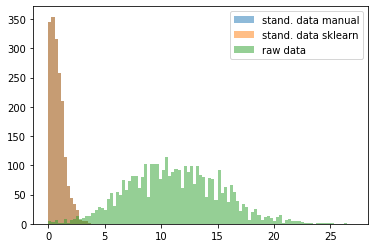

In [36]:
#Estandarizar con sklearn
scaler = StandardScaler()
standDatasetSklearn = scaler.fit_transform(dataset_T)
print('\nEstandarizar con sklearn\n', standDatasetSklearn)

#Estandarizar con funcion
def standardize(dataset):
  standardize = (dataset - np.mean(dataset)) / np.std(dataset)
  return np.array([standardize]).T

standDatasetManual = standardize(dataset[:,1])
print('\nEstandarizar con función\n', standDatasetManual)

plt.hist(standDatasetSklearn, bins, alpha=0.5, label='stand. data manual')
plt.hist(standDatasetManual, bins, alpha=0.5, label='stand. data sklearn')
plt.hist(dataset_T, bins, alpha=0.5, label='raw data')
plt.legend(loc='upper right')
plt.show()

En el histograma siguiente se comparan los valores entre los datos normalizados y los datos estandarizados.

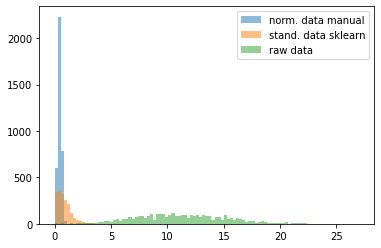

In [37]:
plt.hist(normDatasetSklearn, bins, alpha=0.5, label='norm. data manual')
plt.hist(standDatasetManual, bins, alpha=0.5, label='stand. data sklearn')
plt.hist(dataset_T, bins, alpha=0.5, label='raw data')
plt.legend(loc='upper right')
plt.show()